# import data

In [1]:
import pandas as pd
import os
from PIL import Image
import io

df = pd.read_parquet('data/vn-celeb-data.parquet')
df.head()

,image,label
0,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,ca sĩ Akira Phan
1,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,ca sĩ Akira Phan
2,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,ca sĩ Akira Phan
3,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,ca sĩ Akira Phan
4,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,ca sĩ Akira Phan


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8557 entries, 0 to 8556
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   8557 non-null   object
 1   label   8557 non-null   object
dtypes: object(2)
memory usage: 133.8+ KB


In [ ]:
df.groupby('label').count()

,image
label,
ca sĩ Akira Phan,41
ca sĩ Anh Thơ,41
ca sĩ Bằng Kiều,42
ca sĩ Bảo Anh,35
ca sĩ Bảo Thy,39
...,...
hoa hậu Ngọc Châu,45
hoa hậu Nguyễn Thị Ánh Ngọc,32
hoa hậu Nguyễn Thúc Thùy Tiên,40


In [18]:
df1 = df[df['label'].map(df['label'].value_counts()) >= 20]
df1.groupby('label').count().to_csv("data_info.csv")

In [ ]:


# def save_images_from_df(df, base_dir='data/images'):
#     os.makedirs(base_dir, exist_ok=True)
#     for idx, row in df.iterrows():
#         label_dir = os.path.join(base_dir, row['label'])
#         os.makedirs(label_dir, exist_ok=True)
#         image_bytes = row['image']['bytes']
#         image = Image.open(io.BytesIO(image_bytes)).convert('RGB')
#         image_path = os.path.join(label_dir, f'{idx}.jpg')
#         image.save(image_path)

# Example usage:
# save_images_from_df(df)

In [ ]:
# # Modified code to debug and fix the image format issue
# import face_recognition
# import numpy as np
# from PIL import Image

# # Load image with PIL
# img_path = r"D:\FPTU\Term7\DAT301m\project\data\images\diễn viên Vương Đại Lục\7874.jpg"
# pil_image = Image.open(img_path).convert('RGB')  # Explicitly convert to RGB

# # Convert to numpy array
# image_array = np.array(pil_image)

# # Debug information
# print(f"Image shape: {image_array.shape}")
# print(f"Image dtype: {image_array.dtype}")
# print(f"Image min/max values: {image_array.min()}/{image_array.max()}")

# # Try with face_recognition's own loader to compare
# try:
#     fr_image = face_recognition.load_image_file(img_path)
#     print(f"face_recognition loader shape: {fr_image.shape}")
#     print(f"face_recognition loader dtype: {fr_image.dtype}")
#     # If this worked, use fr_image instead
#     face_locations = face_recognition.face_locations(fr_image)
#     print(f"Found {len(face_locations)} faces")
# except Exception as e:
#     print(f"Error with face_recognition loader: {e}")
    
#     # Try a different approach - create a new image from the array
#     try:
#         # Create a new image from the array to ensure it's in the right format
#         temp_img = Image.fromarray(image_array)
#         # Save and reload (sometimes fixes format issues)
#         temp_path = "temp_image.jpg"
#         temp_img.save(temp_path)
#         # Use face_recognition's loader
#         fr_image = face_recognition.load_image_file(temp_path)
#         face_locations = face_recognition.face_locations(fr_image)
#         print(f"Found {len(face_locations)} faces using the temp file approach")
#     except Exception as e2:
#         print(f"Error with temp file approach: {e2}")

Image shape: (160, 160, 3)
Image dtype: uint8
Image min/max values: 0/232
face_recognition loader shape: (160, 160, 3)
face_recognition loader dtype: uint8
Error with face_recognition loader: Unsupported image type, must be 8bit gray or RGB image.
Error with temp file approach: Unsupported image type, must be 8bit gray or RGB image.


In [ ]:
# # Image.open('data/images/ca sĩ Don Nguyễn/589.jpg').show()
# import face_recognition
# import numpy as np

# img_dir = r'data\images\ca sĩ Khánh Phương\1567.jpg'
# # image = face_recognition.load_image_file(img_dir)
# image = Image.open('data/images/ca sĩ Don Nguyễn/589.jpg')
# face_locations = face_recognition.face_locations(np.array(image))


RuntimeError: Unsupported image type, must be 8bit gray or RGB image.

# khám phá xem data có ai

In [7]:
import unicodedata

def normalize_text(text):
    return unicodedata.normalize('NFC', text).lower()

def find_name_from_labels(search_term):
    """
    Returns a list of unique labels containing the search_term (case-insensitive, Unicode-normalized).
    """
    norm_search = normalize_text(search_term)
    names = df['label'].unique()
    return [label for label in names if norm_search in normalize_text(label)]

# Example usage:
search_term = 'enri'
matching_labels = find_name_from_labels(search_term)
print(f"Labels containing '{search_term}': {matching_labels}")

Labels containing 'enri': ['ca sĩ Enrique Iglesias']


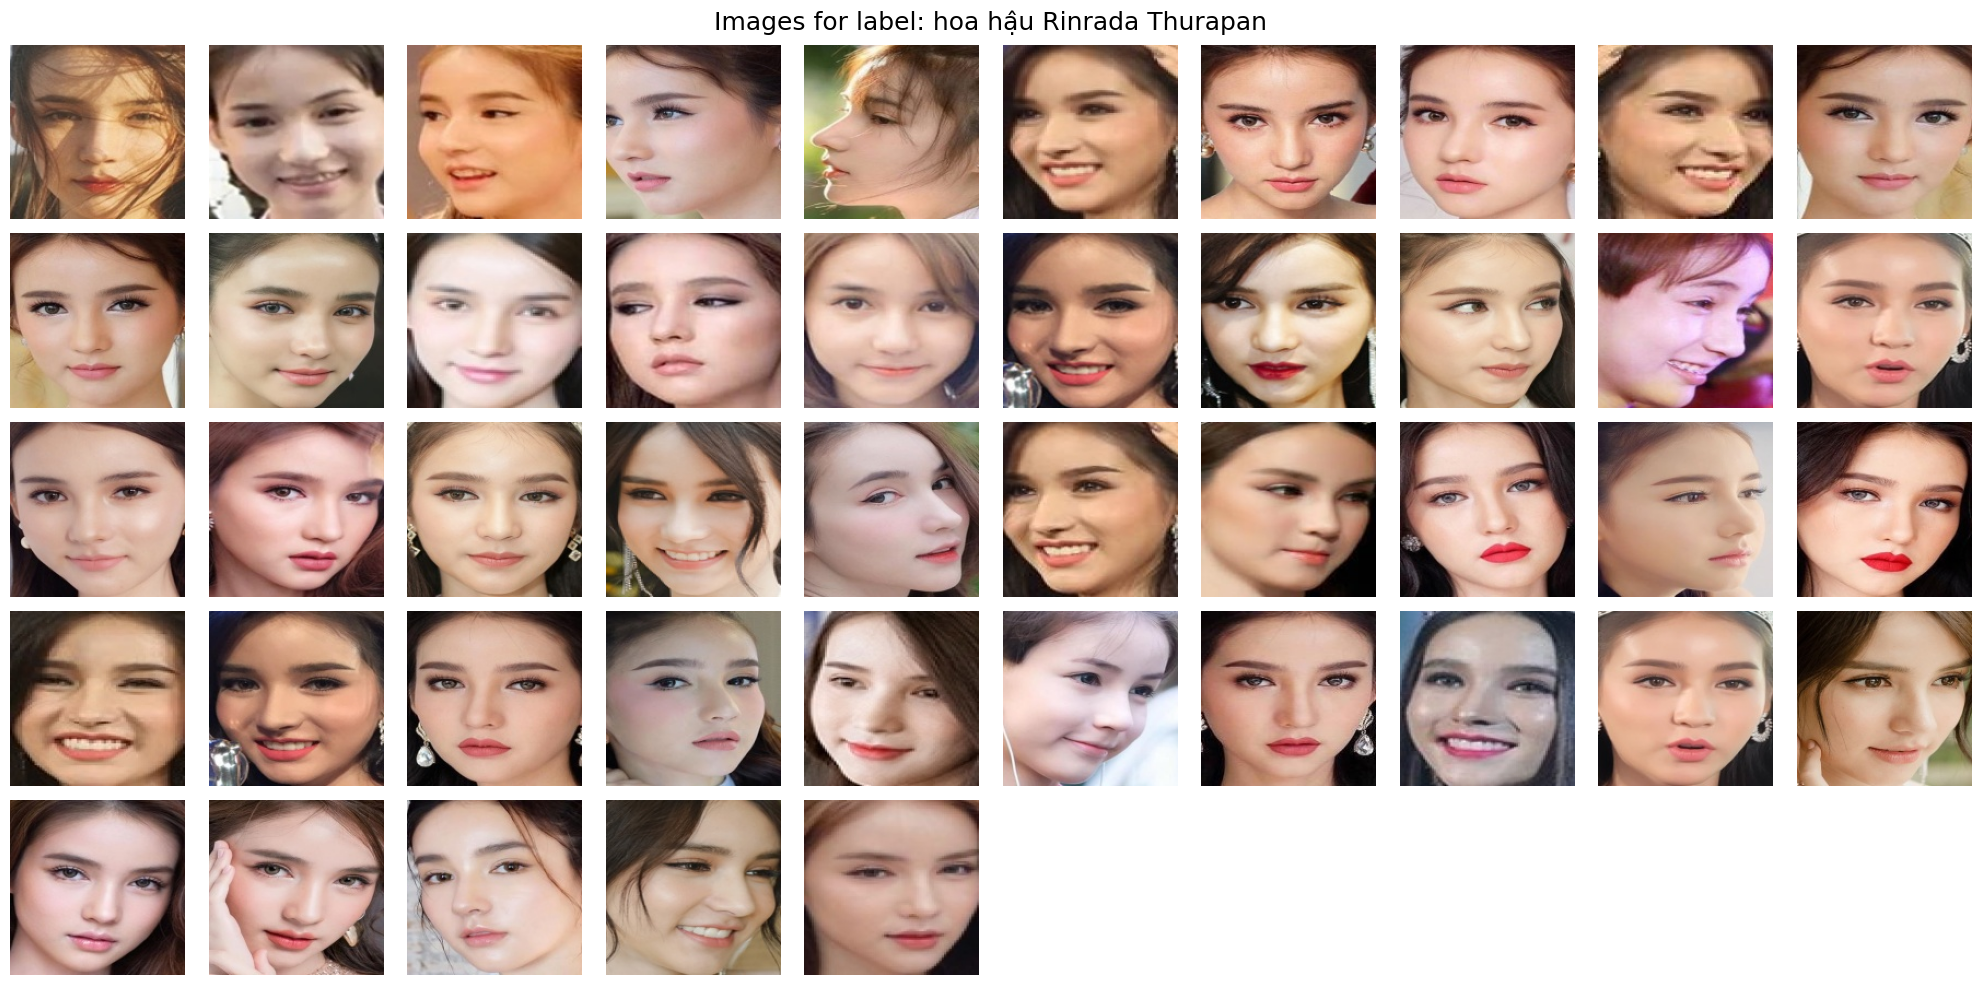

In [19]:

import io
from matplotlib import pyplot as plt


def show_bytes_image_with_label(image_bytes_dict, label, ax=None):
    image_bytes = image_bytes_dict['bytes']
    image = Image.open(io.BytesIO(image_bytes))
    if ax is not None:
        ax.imshow(image)
        # ax.set_title(label, fontsize=8)
        ax.axis('off')
    else:
        plt.imshow(image)
        # plt.title(label)
        plt.axis('off')
        plt.show()


# row = df.iloc[525]
rows = df.loc[df['label'] == 'hoa hậu Rinrada Thurapan']
# for row in rows.itertuples():
#     print(f"Showing image for label: {row.label}")
#     # Display the image with its label
#     show_bytes_image_with_label(row.image, row.label)


# Show multiple images, max 10 per row
max_per_row = 10
num_images = len(rows)
num_rows = (num_images + max_per_row - 1) // max_per_row

fig, axes = plt.subplots(num_rows, max_per_row, figsize=(max_per_row * 2, num_rows * 2))
fig.suptitle(f"Images for label: {rows.iloc[0].label}", fontsize=18)
axes = axes.flatten() if num_rows > 1 else axes

for i, row in enumerate(rows.itertuples()):
    show_bytes_image_with_label(row.image, row.label, ax=axes[i])

# Hide unused axes
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()
    


# rows

In [ ]:
import unicodedata

# df['diễn viên' in df['label'].values]
# Check if 'ca sĩ' appears in any label (Unicode-normalized, case-insensitive)

def normalize_text(text):
    return unicodedata.normalize('NFC', text).lower()

any(normalize_text('ca sĩ') in normalize_text(label) for label in df['label'])

'ca sĩ Akira Phan'

In [52]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [67]:
len(df['label'].unique().tolist())

224

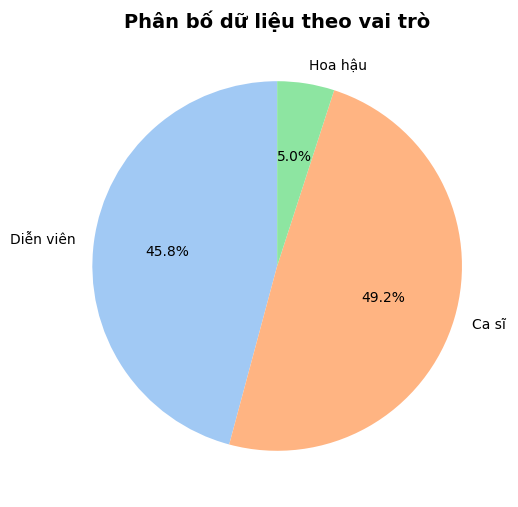

In [59]:
import seaborn as sns

# Extract main roles from the label column
def extract_role(label):
    label = unicodedata.normalize('NFC', label).lower()
    if 'diễn viên' in label:
        return 'Diễn viên'
    elif 'ca sĩ' in label:
        return 'Ca sĩ'
    elif 'hoa hậu' in label:
        return 'Hoa hậu'
    else:
        return 'Khác'

df['role'] = df['label'].apply(extract_role)
role_counts = df['role'].value_counts().reindex(['Diễn viên', 'Ca sĩ', 'Hoa hậu']).fillna(0)

import matplotlib.pyplot as plt

# Prepare data for seaborn
role_counts_df = role_counts.reset_index()
role_counts_df.columns = ['Role', 'Count']

# Plot pie chart using matplotlib and seaborn
plt.figure(figsize=(6, 6))
plt.pie(
    role_counts_df['Count'],
    labels=role_counts_df['Role'],
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('pastel')[0:len(role_counts_df)]
)
plt.title('Phân bố dữ liệu theo vai trò', weight='bold', fontsize=14)
plt.show()

In [69]:
!pip install bs4


   ---------------------------------------- 0/3 [soupsieve]
   ---------------------------------------- 0/3 [soupsieve]
   ------------- -------------------------- 1/3 [beautifulsoup4]
   ------------- -------------------------- 1/3 [beautifulsoup4]
   ------------- -------------------------- 1/3 [beautifulsoup4]
   ------------- -------------------------- 1/3 [beautifulsoup4]
   ------------- -------------------------- 1/3 [beautifulsoup4]
   ------------- -------------------------- 1/3 [beautifulsoup4]
   ------------- -------------------------- 1/3 [beautifulsoup4]
   ------------- -------------------------- 1/3 [beautifulsoup4]
   ------------- -------------------------- 1/3 [beautifulsoup4]
   ---------------------------------------- 3/3 [bs4]



In [ ]:
import requests
from bs4 import BeautifulSoup
import time

def google_search(query, sleep=2):
    """
    Perform a Google search and return the HTML content of the results page.
    """
    headers = {
        "User-Agent": (
            "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
            "AppleWebKit/537.36 (KHTML, like Gecko) "
            "Chrome/120.0.0.0 Safari/537.36"
        )
    }
    url = f"https://www.google.com/search?q={requests.utils.quote(query)}"
    response = requests.get(url, headers=headers)
    time.sleep(sleep)  # Be polite to Google
    if response.status_code == 200:
        return response.text
    else:
        return None

def extract_gender_and_nationality(html):
    """
    Try to extract gender and nationality from Google search result snippets.
    This is a heuristic and may not always be accurate.
    """
    soup = BeautifulSoup(html, "html.parser")
    snippets = []
    for div in soup.find_all("div", class_="BNeawe s3v9rd AP7Wnd"):
        snippets.append(div.get_text())
    text = " ".join(snippets).lower()
    # Heuristic for gender
    if any(word in text for word in ["anh ấy", "ông", "nam", "male", "he", "his"]):
        gender = "Male"
    elif any(word in text for word in ["cô ấy", "bà", "nữ", "female", "she", "her"]):
        gender = "Female"
    else:
        gender = "Unknown"
    # Heuristic for nationality (Vietnamese, etc.)
    if "việt nam" in text or "vietnamese" in text:
        nationality = "Vietnamese"
    elif "mỹ" in text or "american" in text:
        nationality = "American"
    elif "trung quốc" in text or "chinese" in text:
        nationality = "Chinese"
    elif "hàn quốc" in text or "korean" in text:
        nationality = "Korean"
    else:
        nationality = "Unknown"
    return gender, nationality

def get_gender_and_nationality_for_label(label):
    """
    Given a label (person's name), perform Google search and try to extract gender and nationality.
    """
    query = f"{label} là ai"
    html = google_search(query)
    if html:
        return extract_gender_and_nationality(html)
    else:
        return "Unknown", "Unknown"

def enrich_df_with_gender_nationality(df, label_col='label'):
    """
    Add 'gender' and 'nationality' columns to the dataframe by searching Google for each label.
    """
    genders = []
    nationalities = []
    for label in df[label_col]:
        gender, nationality = get_gender_and_nationality_for_label(label)
        genders.append(gender)
        nationalities.append(nationality)
    df = df.copy()
    df['gender'] = genders
    df['nationality'] = nationalities
    return df

# Example usage:
enriched_df = enrich_df_with_gender_nationality(df)